In [48]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../src"))

from preprocessing import preprocess_data
from logistic_regression import (
    train_logistic_regression,
    train_logistic_regression_reg,
    predict,
    accuracy,
    precision,
    recall,
    f1_score
)

In [54]:
df = pd.read_csv("../data/diabetes.csv")
X_train, X_test, y_train, y_test = preprocess_data(df)

df["glucose_bmi_ratio"] = df["Glucose"] / df["BMI"]
df["glucose_bmi_ratio"] = df["glucose_bmi_ratio"].replace([np.inf, -np.inf], np.nan)
df["age_glucose"] = df["Age"] * df["Glucose"]

X_train_xg, X_test_xg, y_train_xg, y_test_xg = preprocess_data(df)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model_1 = DecisionTreeClassifier(random_state=42)
model_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=10, random_state=42)
model_3 = RandomForestClassifier(n_estimators=200, random_state=42)

# model_4 = XGBClassifier(
#     n_estimators=1000,
#     max_depth=4,
#     learning_rate=0.05,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     eval_metric="logloss"
# )

model_4 = XGBClassifier(
    n_estimators=60,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    scale_pos_weight=1.86,
    reg_lambda=1.0,
    reg_alpha=0.1,
    random_state=42,
    eval_metric="logloss"
)

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
model_4.fit(X_train_xg, y_train_xg)

y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)
y_pred_3 = model_3.predict(X_test)
y_pred_4 = model_4.predict(X_test_xg)

In [56]:
print("\n Normal Decision Tree")
print("Accuracy :", accuracy(y_test, y_pred_1))
print("Precision:", precision(y_test, y_pred_1))
print("Recall   :", recall(y_test, y_pred_1))
print("F1-score :", f1_score(y_test, y_pred_1))

print("\n Advance Decision Tree")
print("Accuracy :", accuracy(y_test, y_pred_2))
print("Precision:", precision(y_test, y_pred_2))
print("Recall   :", recall(y_test, y_pred_2))
print("F1-score :", f1_score(y_test, y_pred_2))

print("\n Random Forest Classifier")
print("Accuracy :", accuracy(y_test, y_pred_3))
print("Precision:", precision(y_test, y_pred_3))
print("Recall   :", recall(y_test, y_pred_3))
print("F1-score :", f1_score(y_test, y_pred_3))

print("\n XG Boost Classifier")
print("Accuracy :", accuracy(y_test, y_pred_4))
print("Precision:", precision(y_test, y_pred_4))
print("Recall   :", recall(y_test, y_pred_4))
print("F1-score :", f1_score(y_test, y_pred_4))


 Normal Decision Tree
Accuracy : 0.696969696969697
Precision: 0.5733333333333334
Recall   : 0.5308641975308642
F1-score : 0.5512820512820513

 Advance Decision Tree
Accuracy : 0.7229437229437229
Precision: 0.639344262295082
Recall   : 0.48148148148148145
F1-score : 0.5492957746478874

 Random Forest Classifier
Accuracy : 0.7489177489177489
Precision: 0.676923076923077
Recall   : 0.5432098765432098
F1-score : 0.6027397260273973

 XG Boost Classifier
Accuracy : 0.7575757575757576
Precision: 0.6237623762376238
Recall   : 0.7777777777777778
F1-score : 0.6923076923076923


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

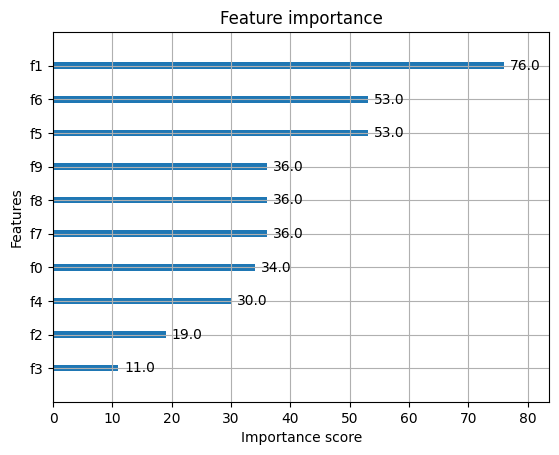

In [57]:
from xgboost import plot_importance
plot_importance(model_4)ok